In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal as signal
import seaborn as sns
import numpy
import pandas

## Match Sales with lagged indicators

In [ ]:
# series_1 is a Pandas Series, series_2 is a Pandas Series, and max_forward is a non-negative integer
def matchByLag (series_1, series_2, max_forward = 0):
   outCorr = numpy.empty([0, 2], dtype = float)
   s1 = series_1.to_numpy()
   nValue1 = len(s1)
   for i in range(max_forward+1):
      s2 = series_2.to_numpy()[i:,]
      nValue = numpy.min([nValue1, len(s2)])
      thisCorr = numpy.corrcoef(x = s1[0:nValue], y = s2[0:nValue])
      outCorr = numpy.append(outCorr, [[i, thisCorr[0,1]]], axis = 0)

   result = pandas.DataFrame(outCorr, columns = ['lag', 'correlation'])
   return (result)

In [ ]:
datapath='~/Desktop/Capstone 1/DATA/'
books=pd.read_csv(datapath+'cleaned_books.csv')
books=books.iloc[:,1:]
books.head()

,Department Dim,Product Group Code,Posting Date,Sum of Sales,Year,Month
0,504,50000.0,1993-01-04,7963.55,1993,1
1,504,50000.0,1993-01-05,14667.70,1993,1
2,504,50000.0,1993-01-06,8421.50,1993,1
3,504,50000.0,1993-01-07,11616.85,1993,1
4,504,50000.0,1993-01-08,15092.72,1993,1


In [ ]:
product_group=books['Product Group Code'].unique()
product_group #12

array([50000., 50400., 50401., 50402., 50403., 50404., 50405., 50406.,
       50407., 50408., 50409., 50420.])

In [ ]:
idx = pd.date_range(books['Posting Date'].min(), books['Posting Date'].max())
sales={}
for i in product_group:
    s=books[books['Product Group Code']==float(i)].sort_values('Posting Date')
    s.index = pd.DatetimeIndex(s['Posting Date'])
    b = s.reindex(idx)
    m=b.groupby([b.index.year,b.index.month])['Sum of Sales'].sum()
    sales[i]=m
    


In [ ]:
sales=pd.DataFrame(sales)
sales.index.names=['Year','Month']
sales

50000.0  50400.0    50401.0   50402.0   50403.0   50404.0  \
Year Month                                                                
1993 1      236875.51     0.00       0.00      0.00      0.00      0.00   
     2      389034.46     0.00       0.00      0.00      0.00      0.00   
     3      221486.85     0.00       0.00      0.00      0.00      0.00   
     4      331739.09     0.00       0.00      0.00      0.00      0.00   
     5      325079.50     0.00       0.00      0.00      0.00      0.00   
...               ...      ...        ...       ...       ...       ...   
2020 12       -118.94  3635.69  439663.65  15190.57  20242.63  13411.93   
2021 1           0.00  3270.14  497630.39  26680.33  20671.67  26301.02   
     2         288.00   665.98  242741.63  12988.13  25359.25  23131.66   
     3         119.18  2349.48  140638.60  40944.19  15243.66   5082.50   
     4           0.00   292.68   55459.74  10012.97   6699.89   1455.00   

             50405.0  50406.0   50407.0  50408.0   50409.0  50420.0  
Year Month                                                           
1993 1          0.00      0.0      0.00     0.00      0.00      0.0  
     2          0.00      0.0      0.00     0.00      0.00      0.0  
     3          0.00      0.0      0.00     0.00      0.00      0.0  
     4          0.00      0.0      0.00     0.00      0.00      0.0  
     5          0.00      0.0      0.00     0.00      0.00      0.0  
...              ...      ...       ...      ...       ...      ...  
2020 12      3782.21  16492.0  16057.29  3844.98  17113.00      0.0  
2021 1       6882.40   8772.0  49403.21  5096.13  46705.00      0.0  
     2       3728.77   2227.0  12585.88  3109.65  53043.50      0.0  
     3      10542.81   2889.0   7149.77  9175.03  46452.49      0.0  
     4        713.34    242.0   3241.47  5373.60  19083.50      0.0  

[340 rows x 12 columns]

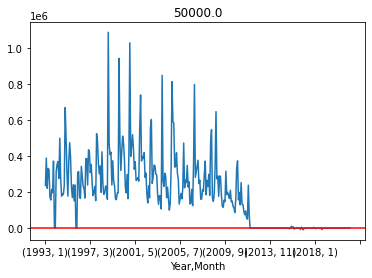

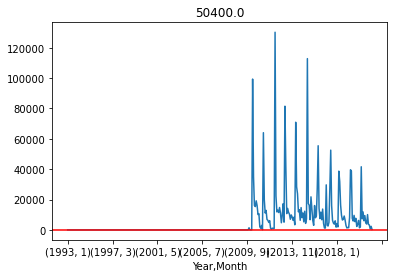

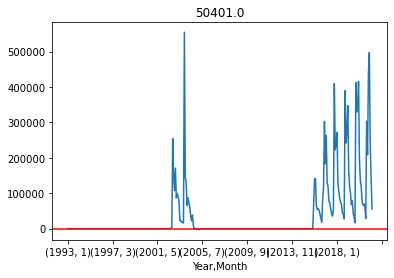

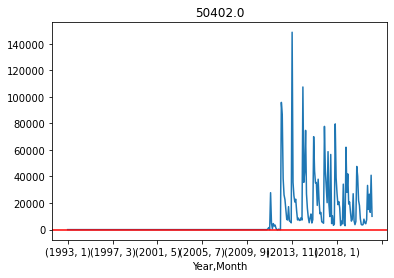

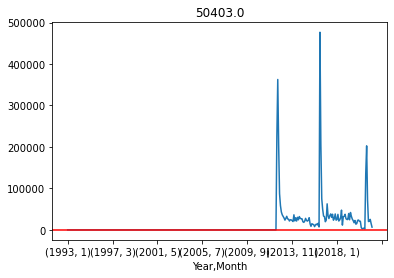

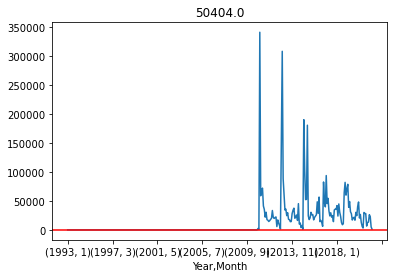

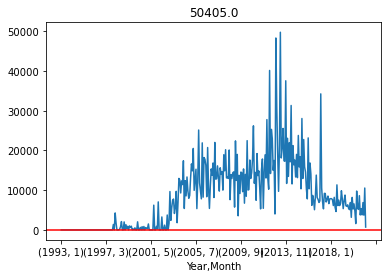

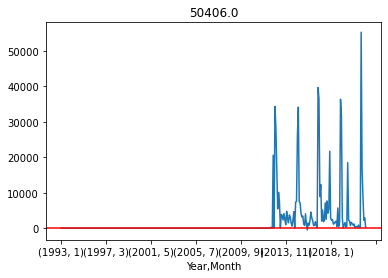

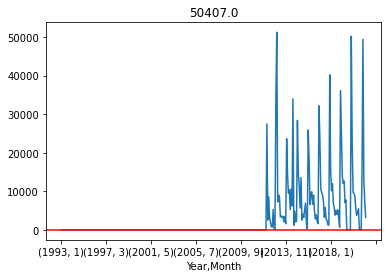

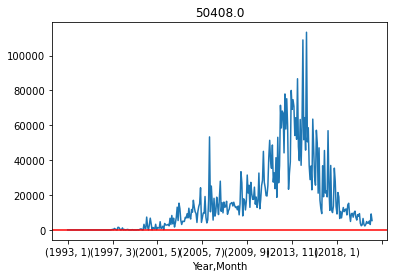

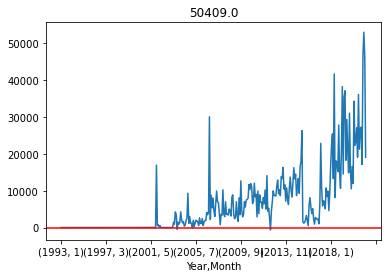

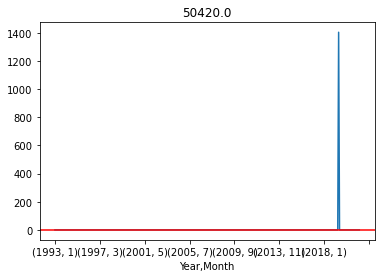

In [ ]:
for i in sales.columns:
    sales[i].plot()
    plt.title(i)
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    plt.show()

In [ ]:
## Trailer Indicator

In [ ]:
df=pd.read_excel(datapath+'Trailer Indicators.xlsx',sheet_name=None,header=None)
sheet_names=list(df.keys())
for i in sheet_names:
    if i =='Notes':
        continue
    df[i]=df[i].iloc[1:,:9]
    df[i].columns=df[i].iloc[0]
    df[i]=df[i].iloc[1:]
    df[i].dropna(axis=1,how='all',inplace=True)
    df[i].rename(columns = {df[i].columns[0]:'Date','Backlog/ \nBuild Ratio':'Backlog/Build Ratio'},inplace=True)
    df[i].replace('--',np.nan,inplace=True)
    df[i]['Year']=df[i].Date.dt.year
    df[i]['Month']=df[i].Date.dt.month

    
trailer_indicator=df.copy()

In [ ]:
trailer_indicator

{'Notes':                                                     0  \
 0   U.S. Trailer OEM Monthly Market Indicators\n--...   
 1                                            Updated:   
 2                         Source: FTR; Copyright 2020   
 3                       Sheet (click to go to sheet):   
 4                                                 NaN   
 5                                       Total Trailer   
 6                                             Dry Van   
 7                                          Reefer Van   
 8                                             Flatbed   
 9                                         Liquid Tank   
 10                                           Dry Tank   
 11                                               Dump   
 12                                             Lowbed   
 13                                          All Other   
 14                                                NaN   
 15                                    Memo-Total Vans   
 16  

In [ ]:
trailer_indicator['Total_Trailer']

1,Date,BACKLOG,BUILD FOR,INVENTORY,NET ORDERS,FACTORY SHIPMENTS,Backlog/Build Ratio,Inventory/Factory Shipments Ratio,Year,Month
2,2008-01-01,NaN,10291.0,NaN,NaN,NaN,NaN,NaN,2008,1
3,2008-02-01,NaN,11750.0,NaN,NaN,NaN,NaN,NaN,2008,2
4,2008-03-01,NaN,12333.0,NaN,NaN,NaN,NaN,NaN,2008,3
5,2008-04-01,NaN,11583.0,NaN,NaN,NaN,NaN,NaN,2008,4
6,2008-05-01,NaN,12336.0,NaN,NaN,NaN,NaN,NaN,2008,5
...,...,...,...,...,...,...,...,...,...,...
155,2020-10-01,152984.0,19991.0,10988.0,56221.0,20919.0,7.652644,0.525264,2020,10
156,2020-11-01,176564.0,17843.0,10439.0,41355.0,18391.0,9.895421,0.567615,2020,11
157,2020-12-01,204397.0,17808.0,10455.0,45639.0,17758.0,11.477819,0.588749,2020,12
158,2021-01-01,216348.0,18172.0,10327.0,30119.0,18290.0,11.905569,0.564625,2021,1


In [ ]:
a=trailer_indicator['Total_Trailer'].set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
totaltrailer_output=[]
for i in a.columns:
    if i=='Date':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        totaltrailer_output.append(r)


/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
totaltrailer_output=pd.DataFrame(totaltrailer_output,columns=col)

In [ ]:
totaltrailer_output.sort_values(by=['Lag','Max Correlation'],ascending=True)

,Indicators,Product Group Code,Lag,Max Correlation
21,BUILD FOR,50409.0,79,0.723074
70,Inventory/Factory Shipments Ratio,50403.0,80,0.892411
75,Inventory/Factory Shipments Ratio,50408.0,88,0.676014
1,BACKLOG,50400.0,90,0.677499
56,Backlog/Build Ratio,50400.0,90,0.794739
...,...,...,...,...
13,BUILD FOR,50401.0,148,0.839721
18,BUILD FOR,50406.0,149,0.469557
14,BUILD FOR,50402.0,149,0.732257
17,BUILD FOR,50405.0,153,0.469531


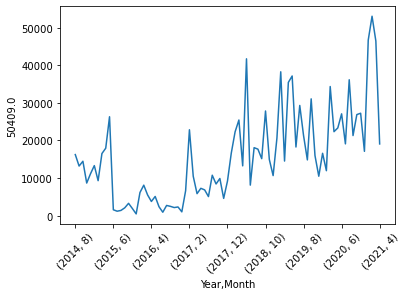

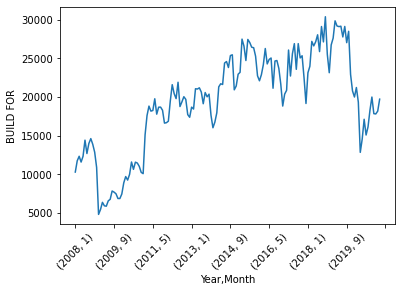

In [ ]:
sales[50409.0][np.where(sales.index==(2008,1))[0][0]:,][79:].plot(ylabel='50409.0')
plt.xticks(rotation=45)
plt.show()
a['BUILD FOR'].dropna().plot(ylabel='BUILD FOR')
plt.xticks(rotation=45)
plt.show()

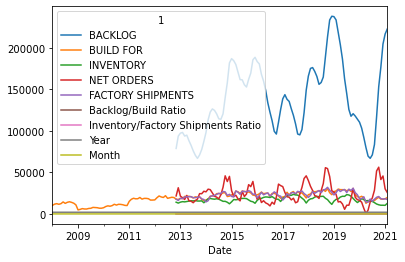

In [ ]:
trailer_indicator['Total_Trailer'].plot(x='Date')

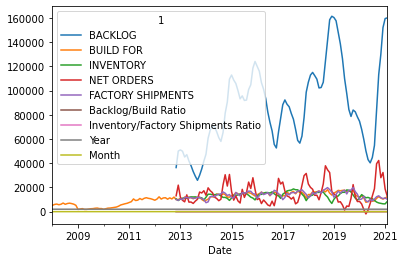

In [ ]:
trailer_indicator['Dry_Van'].plot(x='Date')

In [ ]:
## Truck and Trailer

In [ ]:
# economic-m
economics_m=pd.read_csv(datapath+'economics-m')
economics_m=economics_m.iloc[:,1:]

In [ ]:
economics_m

,Year,Month,Total IP Index,Durable Manufacturing Index,Non-Durable Manufacturing Index,Total Manufacturing Index,Food Index,Chemicals Index,Fabricated Metal Product Index,Automobile and Light-Duty Vehicles Index,...,Building Permits (000's),New Home Sales (000's),Existing Home Sales (000's),National Avg. Diesel/Gal.,Distillate Fuel Inventories (Mil Barrels/Day),W. Texas Int. Crude Oil ($Bbl.),"Truck-General Freight, TL","Truck-General Freight, LTL","Rail-Line Haul, Carload","Rail- Line Haul, Intermodal"
0,1992,JAN,63.3374,41.4923,93.2655,59.2972,81.7305,79.0409,76.9733,49.7661,...,1077,676,NaN,NaN,126733,18.79,NaN,NaN,NaN,NaN
1,1992,FEB,63.7911,42.3678,92.9492,59.8786,81.1607,78.9897,78.0188,56.2704,...,1146,639,NaN,NaN,108773,19.01,NaN,NaN,NaN,NaN
2,1992,MAR,64.3212,42.8058,93.9328,60.5043,81.2563,79.7700,77.9293,58.7673,...,1082,553,NaN,NaN,97676,18.92,NaN,NaN,NaN,NaN
3,1992,APR,64.8088,43.1439,94.2019,60.8433,81.8869,79.9827,78.4044,60.6280,...,1054,546,NaN,NaN,92131,20.23,NaN,NaN,NaN,NaN
4,1992,MAY,65.0202,43.6509,94.1043,61.2039,81.8924,79.2751,79.2963,64.8041,...,1056,554,NaN,NaN,96425,20.98,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2020,OCT,103.8444,103.0820,100.9086,102.0399,114.9477,98.6549,96.0228,127.5002,...,1544,965,6850.0,2.389,155333,39.40,153.9,319.3,203.4,168.0
346,2020,NOV,104.7717,104.4671,101.6598,103.1119,116.0241,99.6302,96.9857,133.8698,...,1635,857,6690.0,2.432,156281,40.94,160.1,316.0,203.4,168.9
347,2020,DEC,105.8405,104.9885,102.8714,103.9749,117.0518,100.5131,97.1510,133.6629,...,1704,919,6760.0,2.585,160441,47.02,165.3,314.7,203.7,172.9
348,2021,JAN,107.0511,106.5207,104.0250,105.3203,118.3489,101.6307,99.4932,131.5740,...,1886,948,6690.0,2.681,162194,52.00,166.5,331.5,204.9,174.3


In [ ]:
import calendar
d = dict((v.upper(),k) for k,v in enumerate(calendar.month_abbr))
economics_m.Month=economics_m.Month.map(d)

In [ ]:
economics_m

,Year,Month,Total IP Index,Durable Manufacturing Index,Non-Durable Manufacturing Index,Total Manufacturing Index,Food Index,Chemicals Index,Fabricated Metal Product Index,Automobile and Light-Duty Vehicles Index,...,Building Permits (000's),New Home Sales (000's),Existing Home Sales (000's),National Avg. Diesel/Gal.,Distillate Fuel Inventories (Mil Barrels/Day),W. Texas Int. Crude Oil ($Bbl.),"Truck-General Freight, TL","Truck-General Freight, LTL","Rail-Line Haul, Carload","Rail- Line Haul, Intermodal"
0,1992,1,63.3374,41.4923,93.2655,59.2972,81.7305,79.0409,76.9733,49.7661,...,1077,676,NaN,NaN,126733,18.79,NaN,NaN,NaN,NaN
1,1992,2,63.7911,42.3678,92.9492,59.8786,81.1607,78.9897,78.0188,56.2704,...,1146,639,NaN,NaN,108773,19.01,NaN,NaN,NaN,NaN
2,1992,3,64.3212,42.8058,93.9328,60.5043,81.2563,79.7700,77.9293,58.7673,...,1082,553,NaN,NaN,97676,18.92,NaN,NaN,NaN,NaN
3,1992,4,64.8088,43.1439,94.2019,60.8433,81.8869,79.9827,78.4044,60.6280,...,1054,546,NaN,NaN,92131,20.23,NaN,NaN,NaN,NaN
4,1992,5,65.0202,43.6509,94.1043,61.2039,81.8924,79.2751,79.2963,64.8041,...,1056,554,NaN,NaN,96425,20.98,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2020,10,103.8444,103.0820,100.9086,102.0399,114.9477,98.6549,96.0228,127.5002,...,1544,965,6850.0,2.389,155333,39.40,153.9,319.3,203.4,168.0
346,2020,11,104.7717,104.4671,101.6598,103.1119,116.0241,99.6302,96.9857,133.8698,...,1635,857,6690.0,2.432,156281,40.94,160.1,316.0,203.4,168.9
347,2020,12,105.8405,104.9885,102.8714,103.9749,117.0518,100.5131,97.1510,133.6629,...,1704,919,6760.0,2.585,160441,47.02,165.3,314.7,203.7,172.9
348,2021,1,107.0511,106.5207,104.0250,105.3203,118.3489,101.6307,99.4932,131.5740,...,1886,948,6690.0,2.681,162194,52.00,166.5,331.5,204.9,174.3


In [ ]:
a=economics_m.set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
em_output=[]
for i in a.columns:
    if i=='Date':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        if len(indicators)<len(sales[j]):
            sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        else:
            sale_series=sales[j]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        em_output.append(r)
    

In [ ]:
em_output=pd.DataFrame(em_output)
em_output.columns=col

In [ ]:
em=em_output[em_output.Lag<=18].sort_values(by=['Lag','Max Correlation'],ascending=[True,False])
em

,Indicators,Product Group Code,Lag,Max Correlation
424,National Avg. Diesel/Gal.,50405.0,0,0.710146
460,"Truck-General Freight, TL",50408.0,0,0.589629
457,"Truck-General Freight, TL",50405.0,0,0.577702
17,Durable Manufacturing Index,50405.0,0,0.569143
372,Consumer Price Index,50408.0,0,0.553094
369,Consumer Price Index,50405.0,0,0.551611
471,"Truck-General Freight, LTL",50408.0,0,0.509138
468,"Truck-General Freight, LTL",50405.0,0,0.504516
358,Retail Sales (Mil $),50405.0,0,0.498573
250,Business Inventories (Mil $),50407.0,0,0.496746


In [ ]:
pd.DataFrame(em.Indicators.unique(),columns=['economics-m'])

,economics-m
0,National Avg. Diesel/Gal.
1,"Truck-General Freight, TL"
2,Durable Manufacturing Index
3,Consumer Price Index
4,"Truck-General Freight, LTL"
5,Retail Sales (Mil $)
6,Business Inventories (Mil $)
7,Durable Goods Orders (Mil $)
8,Other Transportation Employment (000's)
9,Total Transp. and Warehouse Emp. (000's)


In [ ]:
em['Product Group Code'].unique()

array([50405., 50408., 50407., 50402., 50406., 50000., 50409., 50400.,
       50401.])

In [ ]:
[x for x in sales.columns if x not in em['Product Group Code'].unique()] #IMO AND ERG

[50403.0, 50404.0, 50420.0]

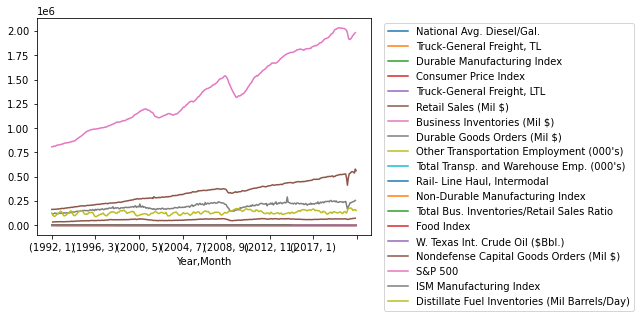

In [ ]:
a[em.Indicators.unique()].plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.8, 1))

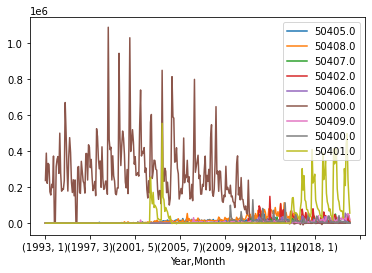

In [ ]:
sales[em['Product Group Code'].unique()].plot()

In [ ]:
# indicators-m

In [ ]:
indicators_m=pd.read_csv(datapath+'indicators-m')
indicators_m=indicators_m.iloc[:,1:]
indicators_m.Month=indicators_m.Month.map(d)
indicators_m

,Year,Month,OEM Net Orders,M/M % Change,Y/Y % Change,Factory Shipments (Ward's),M/M % Change.1,Y/Y % Change.1,Retail Sales (Ward's),M/M % Change.2,...,U.S..4,CAN.4,MEX.4,U.S..5,CAN.5,MEX.5,U.S. 1.3,U.S. 2.3,U.S. 3.3,U.S. 3.4
0,1992,1,NaN,NaN,NaN,NaN,NaN,NaN,6738,NaN,...,1272.0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1992,2,NaN,NaN,NaN,NaN,NaN,NaN,7627,13.193826,...,1649.0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1992,3,NaN,NaN,NaN,NaN,NaN,NaN,8480,11.183952,...,2092.0,0,0,0,0,0,4862.0,0.0,0.0,0.0
3,1992,4,NaN,NaN,NaN,NaN,NaN,NaN,10864,28.113208,...,2137.0,0,0,0,0,0,-4862.0,0.0,0.0,0.0
4,1992,5,NaN,NaN,NaN,NaN,NaN,NaN,9600,-11.634757,...,2223.0,0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2020,10,40299.0,26.646763,83.469155,21695.0,7.715605,-18.270861,23135,0.012969,...,287.5,203,259,8178,146,0,1619.0,2.0,0.0,0.0
346,2020,11,52807.0,31.037991,200.142094,19400.0,-10.578474,-10.800497,21821,-5.679706,...,1642.0,167,300,8088,138,0,988.0,0.0,0.0,3.0
347,2020,12,51957.0,-1.609635,164.439129,18161.0,-6.386598,3.997022,25688,17.721461,...,2666.0,198,418,7876,116,0,906.0,1.0,0.0,1.0
348,2021,1,42903.0,-17.425948,144.726485,17935.0,-1.244425,-14.137304,19992,-22.173778,...,1367.0,84,206,8221,104,0,1180.0,0.0,0.0,1.0


In [ ]:
a=indicators_m.set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
im_output=[]
for i in a.columns:
    if i=='Date':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        if len(indicators)<len(sales[j]):
            sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        else:
            sale_series=sales[j]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        im_output.append(r)
    

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]

In [ ]:
im_output=pd.DataFrame(im_output)
im_output.columns=col

In [ ]:
im_output.sort_values(by=['Lag','Max Correlation'],ascending=[True,False])

,Indicators,Product Group Code,Lag,Max Correlation
506,MEX.1,50000.0,-1,NaN
507,MEX.1,50400.0,-1,NaN
508,MEX.1,50401.0,-1,NaN
509,MEX.1,50402.0,-1,NaN
510,MEX.1,50403.0,-1,NaN
...,...,...,...,...
44,M/M % Change.1,50000.0,300,0.927194
48,M/M % Change.1,50403.0,300,0.907065
33,Factory Shipments (Ward's),50000.0,300,0.797979
54,M/M % Change.1,50409.0,300,0.680249


In [ ]:
for i in indicators_m.columns:
    if sum(indicators_m[i]!=0)==0:
        print(i)

MEX.1
MEX.3
CAN 2.2
CAN 3.2
CAN 4.2
MEX.5


These variables are constant.

In [ ]:
im_output[~(im_output['Indicators'].isin(['MEX.1','MEX.3','CAN 2.2','CAN 3.2','CAN 4.2','MEX.5']))]

,Indicators,Product Group Code,Lag,Max Correlation
0,OEM Net Orders,50000.0,158,1.000000
1,OEM Net Orders,50400.0,158,1.000000
2,OEM Net Orders,50401.0,158,1.000000
3,OEM Net Orders,50402.0,158,1.000000
4,OEM Net Orders,50403.0,158,1.000000
...,...,...,...,...
963,U.S. 3.4,50405.0,159,0.423082
964,U.S. 3.4,50406.0,274,0.380038
965,U.S. 3.4,50407.0,263,0.437578
966,U.S. 3.4,50408.0,164,0.575930


In [ ]:
im_output.dropna(subset=['Max Correlation'],inplace=True)
im_output.sort_values(by=['Lag','Max Correlation'],ascending=[True,False]).head(50)

,Indicators,Product Group Code,Lag,Max Correlation
758,U.S. 3.2,50409.0,0,0.706431
471,CAN,50408.0,0,0.575877
911,CAN.5,50408.0,0,0.546067
479,MEX,50405.0,0,0.488406
677,MEX.2,50405.0,0,0.487661
468,CAN,50405.0,0,0.484274
501,CAN.1,50405.0,0,0.443739
666,CAN.2,50405.0,0,0.439352
875,CAN.4,50405.0,0,0.435104
427,MEX 2,50408.0,0,0.423401


In [ ]:
im=im_output[im_output.Lag<=18].sort_values(by=['Lag','Max Correlation'],ascending=[True,False])

In [ ]:
im

,Indicators,Product Group Code,Lag,Max Correlation
758,U.S. 3.2,50409.0,0,0.706431
471,CAN,50408.0,0,0.575877
911,CAN.5,50408.0,0,0.546067
479,MEX,50405.0,0,0.488406
677,MEX.2,50405.0,0,0.487661
...,...,...,...,...
421,MEX 2,50402.0,17,0.545244
158,Y/Y % Change.4,50403.0,17,0.264489
228,Y/Y % Change.6,50407.0,17,0.152655
426,MEX 2,50407.0,18,0.577659


In [ ]:
pd.DataFrame(im.Indicators.unique(),columns=['indicators-m'])

,indicators-m
0,U.S. 3.2
1,CAN
2,CAN.5
3,MEX
4,MEX.2
5,CAN.1
6,CAN.2
7,CAN.4
8,MEX 2
9,CAN 4


In [ ]:
im['Product Group Code'].unique()

array([50409., 50408., 50405., 50000., 50403., 50400., 50404., 50402.,
       50406., 50407., 50401.])

In [ ]:
indicators_m[im.Indicators.unique()]

,U.S. 3.2,CAN,CAN.5,MEX,MEX.2,CAN.1,CAN.2,CAN.4,MEX 2,CAN 4,...,U.S. 2.3,MEX 4.2,U.S. 3.3,CAN 1.1,CAN 3.1,CAN 1,CAN 2,MEX 1.1,Y/Y % Change.4,Y/Y % Change.6
0,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,52.0,2397,146,1964,776,8893,2169,203,8579.0,0.0,...,2.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,-29.836445,-11.245927
346,76.0,2137,138,1881,810,8846,1728,167,7153.0,0.0,...,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,-22.130575,11.001118
347,52.0,2373,116,1913,1249,8221,1837,198,6276.0,0.0,...,1.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,-14.306338,6.417525
348,82.0,1638,104,1510,681,9039,793,84,5478.0,0.0,...,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,-9.130913,9.245252


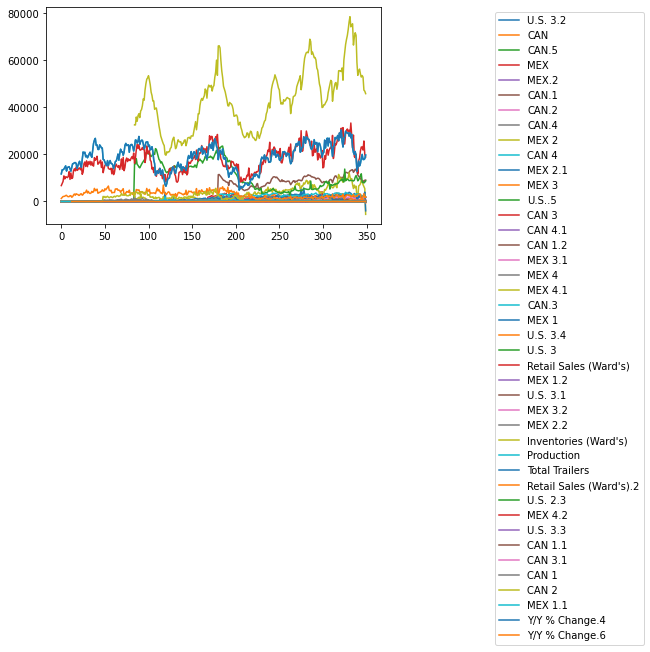

In [ ]:
indicators_m[im.Indicators.unique()].plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.8, 1))

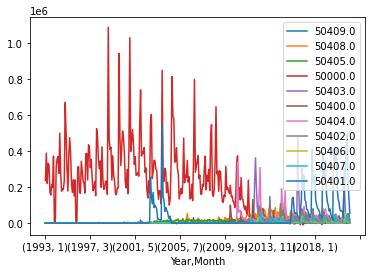

In [ ]:
sales[im['Product Group Code'].unique()].plot()

In [ ]:
a['OEM Net Orders'].dropna()

Year  Month
2008  1        22133.0
      2        15372.0
      3        15890.0
      4        18662.0
      5        18160.0
                ...   
2020  10       40299.0
      11       52807.0
      12       51957.0
2021  1        42903.0
      2        44710.0
Name: OEM Net Orders, Length: 158, dtype: float64

In [ ]:
sales.columns

Float64Index([50000.0, 50400.0, 50401.0, 50402.0, 50403.0, 50404.0, 50405.0,
              50406.0, 50407.0, 50408.0, 50409.0, 50420.0],
             dtype='float64')

In [ ]:
sales[50401.0].iloc[180:]

Year  Month
2008  1             0.00
      2             0.00
      3             0.00
      4             0.00
      5             0.00
                 ...    
2020  12       439663.65
2021  1        497630.39
      2        242741.63
      3        140638.60
      4         55459.74
Name: 50401.0, Length: 160, dtype: float64

In [ ]:
# freight-m

In [ ]:
freight_m=pd.read_csv(datapath+'freight-m')
freight_m=freight_m.iloc[:,1:]
freight_m.Month=freight_m.Month.map(d)
freight_m

,Year,Month,"FTR Truck Loadings (000s, SA)",FTR Truck Loadings Index (1992=100),M/M % Change,Y/Y % Change,"FTR Rail Intermodal Loadings (000, SA)",FTR Rail Intermodal Loadings Index (1992=100),M/M % Change.1,Y/Y % Change.1,...,"Transportation Equipment (000s, SA)","All Other Freight (000s, SA)","FTR MD Truck Tonnage (000s, SA)",FTR MD Truck Tonnage Index (1992=100),M/M % Change.5,Y/Y % Change.5,"FTR MD Truck Tonmiles (000000s, SA)",FTR MD Truck Tonmiles Index (1992=100),M/M % Change.6,Y/Y % Change.6
0,1992,1,42923.478144,96.985760,NaN,NaN,550.396595,98.762370,NaN,NaN,...,2266.185691,21339.977517,93803.792704,98.667097,NaN,NaN,5936.731399,97.277841,NaN,NaN
1,1992,2,43029.250092,97.224752,0.246420,NaN,563.498645,101.113382,2.380474,NaN,...,2388.153341,21444.716725,93092.206116,97.918618,-0.758590,NaN,5895.322992,96.599333,-0.697495,NaN
2,1992,3,43569.191027,98.444750,1.254823,NaN,539.852410,96.870336,-4.196325,NaN,...,2443.743476,21605.590316,94654.943720,99.562376,1.678699,NaN,5955.723109,97.589034,1.024543,NaN
3,1992,4,44421.579068,100.370724,1.956401,NaN,549.777873,98.651347,1.838551,NaN,...,2353.581891,22222.175581,95906.185909,100.878490,1.321898,NaN,6102.142634,99.988229,2.458468,NaN
4,1992,5,44679.069698,100.952525,0.579652,NaN,547.140201,98.178047,-0.479771,NaN,...,2444.062205,22330.403991,96278.495119,101.270102,0.388201,NaN,6109.197299,100.103825,0.115610,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2023,8,70842.753839,160.069468,0.132100,2.036393,1463.186600,262.552089,0.211612,2.806553,...,5784.676973,34235.626505,151218.664086,159.058671,0.157087,1.862402,10993.945233,180.144120,0.153372,2.095805
380,2023,9,70935.580527,160.279210,0.131032,1.973104,1466.240276,263.100036,0.208700,2.779361,...,5779.486581,34294.503905,151454.434356,159.306665,0.155913,1.840522,11011.278027,180.428131,0.157658,2.081569
381,2023,10,71035.878790,160.505834,0.141393,1.945578,1469.230318,263.636565,0.203926,2.751254,...,5770.895871,34354.796186,151680.887003,159.544858,0.149519,1.832749,11030.655021,180.745638,0.175974,2.136830
382,2023,11,71121.360435,160.698981,0.120336,1.877631,1472.232528,264.175277,0.204339,2.716335,...,5758.597624,34413.963537,151919.790337,159.796148,0.157504,1.833135,11047.821301,181.026920,0.155623,2.117044


In [ ]:
a=freight_m.set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
fm_output=[]
for i in a.columns:
    if i=='Date':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        if len(indicators)<len(sales[j]):
            sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        else:
            sale_series=sales[j]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        fm_output.append(r)
    

In [ ]:
fm_output=pd.DataFrame(fm_output)
fm_output.columns=col

In [ ]:
fm=fm_output[fm_output.Lag<=18].sort_values(by=['Lag','Max Correlation'],ascending=[True,False])
fm

,Indicators,Product Group Code,Lag,Max Correlation
50,"FTR Rail Intermodal Loadings (000, SA)",50405.0,0,0.587670
61,FTR Rail Intermodal Loadings Index (1992=100),50405.0,0,0.587670
337,"Transportation Equipment (000s, SA)",50406.0,0,0.312573
338,"Transportation Equipment (000s, SA)",50407.0,1,0.433273
294,"Food & Kindred Products (000s, SA)",50407.0,5,0.444880
296,"Food & Kindred Products (000s, SA)",50409.0,10,0.794981


In [ ]:
fm.Indicators.unique()

array(['FTR Rail Intermodal Loadings (000, SA)',
       'FTR Rail Intermodal Loadings Index (1992=100)',
       'Transportation Equipment (000s, SA)',
       'Food & Kindred Products (000s, SA)'], dtype=object)

In [ ]:
freight_m[fm.Indicators.unique()]

,"FTR Rail Intermodal Loadings (000, SA)",FTR Rail Intermodal Loadings Index (1992=100),"Transportation Equipment (000s, SA)","Food & Kindred Products (000s, SA)"
0,550.396595,98.762370,2266.185691,6534.131885
1,563.498645,101.113382,2388.153341,6462.440150
2,539.852410,96.870336,2443.743476,6495.537417
3,549.777873,98.651347,2353.581891,6620.956039
4,547.140201,98.178047,2444.062205,6604.793809
...,...,...,...,...
379,1463.186600,262.552089,5784.676973,11061.665801
380,1466.240276,263.100036,5779.486581,11084.671270
381,1469.230318,263.636565,5770.895871,11111.484786
382,1472.232528,264.175277,5758.597624,11134.408111


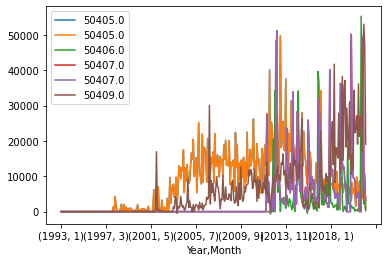

In [ ]:
sales[fm['Product Group Code']].plot()

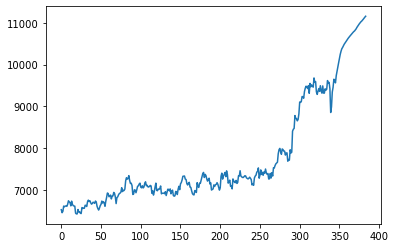

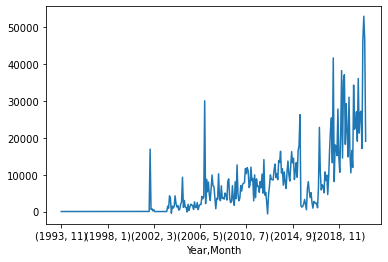

In [ ]:
freight_m['Food & Kindred Products (000s, SA)'].plot()
plt.show()
sales[50409.0].iloc[10:].plot()
plt.show()

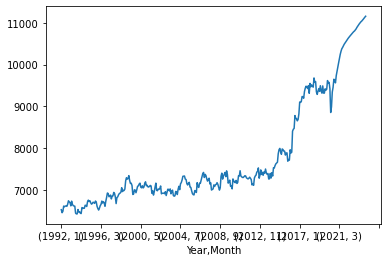

In [ ]:
a['Food & Kindred Products (000s, SA)'].plot()

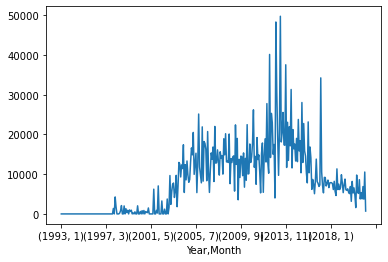

In [ ]:
sales[50405.0].plot()

In [ ]:
# Trucking Database

In [ ]:
trucking=pd.read_excel('DATA/Trucking Database.xlsx',sheet_name='MONTHLY')

In [ ]:
trucking=trucking.iloc[1:,1:].dropna(how='all',axis=1)
year=trucking.iloc[0].dropna()
month=trucking.iloc[1,2:]
trucking=trucking.iloc[3:,]
trucking.drop('Unnamed: 2',1,inplace=True)
trucking=trucking.dropna(how='all',axis=0)
trucking=trucking[~trucking.iloc[:,0].isin(['History','Forecast'])]
col=trucking.iloc[:,0]
trucking=trucking.T.iloc[1:]
trucking.columns=col
trucking.dropna(how='all',axis=1,inplace=True)
trucking.insert(0,'Month',month)
trucking.insert(0,'Year',year)

In [ ]:
trucking.Month=trucking.Month.map(d)

In [ ]:
trucking

Unnamed: 1,Year,Month,Active Truck Utilization (SA),Total Truck Loadings (SA),Commodities: Food & Kindred Products (SA),"Commodities: Stone, Clay, Glass & Concrete (SA)","Commodities: Nonmetallic Minerals, Except Fuels (SA)",Commodities: Chemicals & Allied Products (SA),Commodities: Transportation Equipment (SA),Commodities: All Other (SA),...,"Durables Manufacturing (Index, 2012=100)","Total Mining (Index, 2012=100)","Total Utilities (Index, 2012=100)","Class 8 Truck Net Orders, US/CAN","New Truck Lead Time (N.A., months)",West Coast Port Container Activity (TEU's),Cass Freight Shipments Index,Transportation Services Index - Freight,"PPI: Trucking, General Freight - TL (Index)","PPI: Trucking, General Freight - LTL (Index)"
1,2000,1,0.892701,55300445.515643,7093593.847807,4843482.520653,9604667.881056,2203511.65374,4461832.337963,27093357.274424,...,83.225,88.2104,89.8193,NaN,NaN,NaN,113.4,105.3,106.1,141.5
2,2000,2,0.895354,55629250.446515,7103703.852817,4771229.33169,9974767.820143,2213687.799329,4415540.168171,27150321.474365,...,83.4548,88.5551,90.9903,NaN,NaN,NaN,111.2,104.4,106.4,143.1
3,2000,3,0.898599,55904526.98306,7147246.466562,4776904.592835,10075375.185088,2229680.909696,4398919.869774,27276399.959104,...,84.1753,89.4601,88.4957,NaN,NaN,NaN,114.2,99.2,107,144.5
4,2000,4,0.918205,56764880.034945,7168583.506245,4800001.478544,10243922.681915,2279142.137098,4435867.554692,27837362.676452,...,85.0383,88.4042,90.3785,NaN,NaN,NaN,110.2,98.1,107.5,144.4
5,2000,5,0.919769,55890550.011953,7073870.617887,4728972.276833,9722113.141311,2248266.323837,4407852.065419,27709475.586665,...,85.3292,88.1705,93.7335,NaN,NaN,NaN,110.3,98.6,107.9,144.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2022,10,0.958933,69680195.903389,10804465.245266,6163110.877692,10501757.480122,2850962.058251,5702089.920277,33657810.321781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,2022,11,0.95873,69810575.510761,10828001.339214,6170361.656202,10516987.140653,2852166.384091,5727112.557775,33715946.432826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,2022,12,0.958913,69943198.144932,10854657.819276,6179836.847769,10534473.652553,2854684.50835,5745908.81349,33773636.503495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,2023,1,0.959727,70089980.995482,10889878.891048,6196371.822939,10559185.703349,2861177.171204,5753502.930446,33829864.476496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in trucking.select_dtypes('object').columns:
    trucking[i]=trucking[i].astype('float')

In [ ]:
trucking.shape

(278, 114)

In [ ]:
trucking.columns

Index(['Year', 'Month', 'Active Truck Utilization (SA)',
       'Total Truck Loadings (SA)',
       'Commodities: Food & Kindred Products (SA)',
       'Commodities: Stone, Clay, Glass & Concrete (SA)',
       'Commodities: Nonmetallic Minerals, Except Fuels (SA)',
       'Commodities: Chemicals & Allied Products (SA)',
       'Commodities: Transportation Equipment (SA)',
       'Commodities: All Other (SA)',
       ...
       'Durables Manufacturing (Index, 2012=100)',
       'Total Mining (Index, 2012=100)', 'Total Utilities (Index, 2012=100)',
       'Class 8 Truck Net Orders, US/CAN',
       'New Truck Lead Time (N.A., months)',
       'West Coast Port Container Activity (TEU's)',
       'Cass Freight Shipments Index',
       'Transportation Services Index - Freight',
       'PPI: Trucking, General Freight - TL (Index)',
       'PPI: Trucking, General Freight - LTL (Index)'],
      dtype='object', name='Unnamed: 1', length=114)

In [ ]:
a=trucking.set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
trucking_output=[]
for i in a.columns:
    if i=='Time':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        if len(indicators)<len(sales[j]):
            sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        else:
            sale_series=sales[j]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        trucking_output.append(r)
    

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
trucking_output=pd.DataFrame(trucking_output,columns=col)

In [ ]:
to=trucking_output[trucking_output.Lag<=18].sort_values(by=['Lag','Max Correlation'],ascending=[True,False])

In [ ]:
to

,Indicators,Product Group Code,Lag,Max Correlation
600,National Avg. Diesel Fuel Price ($/Gal.),50405.0,0,0.569973
921,Personal Income (Mil $),50407.0,0,0.484498
1042,Warehousing Employment (000's),50407.0,0,0.443538
589,"Driver Labor Index (1992=100, SA)",50405.0,0,0.383306
863,Consumer Price Index,50404.0,0,0.381662
1215,"PPI: Trucking, General Freight - TL (Index)",50404.0,0,0.378566
631,TCI Component: Utilization,50403.0,0,0.376482
1050,"Avg Weekly Earnings, Total Private ($)",50404.0,0,0.365293
918,Personal Income (Mil $),50404.0,0,0.363560
962,Service Providing Employment (000's),50404.0,0,0.342728


In [ ]:
pd.DataFrame(to.Indicators.unique(),columns=['trucking'])

,trucking
0,National Avg. Diesel Fuel Price ($/Gal.)
1,Personal Income (Mil $)
2,Warehousing Employment (000's)
3,"Driver Labor Index (1992=100, SA)"
4,Consumer Price Index
5,"PPI: Trucking, General Freight - TL (Index)"
6,TCI Component: Utilization
7,"Avg Weekly Earnings, Total Private ($)"
8,Service Providing Employment (000's)
9,"Durables Manufacturing (Index, 2012=100)"


In [ ]:
to['Product Group Code'].unique()

array([50405., 50407., 50404., 50403., 50406., 50400., 50409., 50401.,
       50402.])

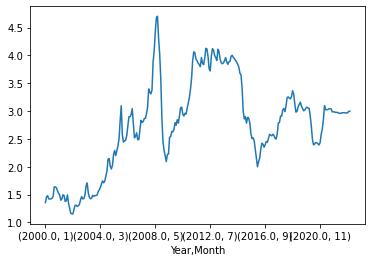

In [ ]:
a['National Avg. Diesel Fuel Price ($/Gal.)'].plot()

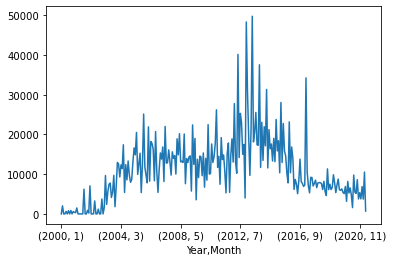

In [ ]:
sales[50405.0].iloc[np.where(sales.index==(2000,1))[0][0]:].plot()

In [ ]:
# Intermodal

In [ ]:
## rates_m

In [ ]:
rates_m=pd.read_excel('DATA/Intermodal Database.xlsx',sheet_name='rates-m')

year=rates_m.iloc[0,3:].dropna().to_numpy()
month=rates_m.iloc[1,3:].dropna().to_numpy()
rates_m.dropna(how='all',axis=1,inplace=True)
rates_m=rates_m.iloc[3:,1:]
col=rates_m.iloc[:,0]
rates_m=rates_m.T.iloc[1:]
rates_m.columns=col
rates_m.reset_index(drop=True,inplace=True)
rates_m.insert(0,'Month',month)
rates_m.insert(0,'Year',year)

In [ ]:
rates_m

Unnamed: 1,Year,Month,Total Intermodal (w/o FSC),Total Intermodal (w/ FSC)
0,1992,JAN,NaN,NaN
1,1992,FEB,NaN,NaN
2,1992,MAR,NaN,NaN
3,1992,APR,NaN,NaN
4,1992,MAY,NaN,NaN
...,...,...,...,...
355,2021,AUG,130.96437,141.286814
356,2021,SEP,130.736397,141.03669
357,2021,OCT,130.434989,140.645007
358,2021,NOV,130.216458,140.392738


In [ ]:
rates_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        360 non-null    object
 1   Month                       360 non-null    object
 2   Total Intermodal (w/o FSC)  228 non-null    object
 3   Total Intermodal (w/ FSC)   228 non-null    object
dtypes: object(4)
memory usage: 11.4+ KB


In [ ]:
rates_m.Year=rates_m.Year.astype('int')
rates_m['Total Intermodal (w/o FSC)']=rates_m['Total Intermodal (w/o FSC)'].astype('float')
rates_m['Total Intermodal (w/ FSC)']=rates_m['Total Intermodal (w/ FSC)'].astype('float')
rates_m.Month=rates_m.Month.map(d)

In [ ]:
rates_m

Unnamed: 1,Year,Month,Total Intermodal (w/o FSC),Total Intermodal (w/ FSC)
0,1992,1,NaN,NaN
1,1992,2,NaN,NaN
2,1992,3,NaN,NaN
3,1992,4,NaN,NaN
4,1992,5,NaN,NaN
...,...,...,...,...
355,2021,8,130.964370,141.286814
356,2021,9,130.736397,141.036690
357,2021,10,130.434989,140.645007
358,2021,11,130.216458,140.392738


In [ ]:
a=rates_m.set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
rates_output=[]
for i in a.columns:
    if i=='Time':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        if len(indicators)<len(sales[j]):
            sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        else:
            sale_series=sales[j]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        rates_output.append(r)
    

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
rates_output=pd.DataFrame(rates_output,columns=col)

In [ ]:
rates_output.sort_values(by=['Lag','Max Correlation'],ascending=['True','False'])

,Indicators,Product Group Code,Lag,Max Correlation
5,Total Intermodal (w/o FSC),50404.0,1,0.263136
1,Total Intermodal (w/o FSC),50400.0,4,0.172588
12,Total Intermodal (w/ FSC),50400.0,4,0.249608
21,Total Intermodal (w/ FSC),50409.0,150,0.784324
10,Total Intermodal (w/o FSC),50409.0,152,0.753798
16,Total Intermodal (w/ FSC),50404.0,207,0.347889
4,Total Intermodal (w/o FSC),50403.0,207,0.585843
7,Total Intermodal (w/o FSC),50406.0,208,0.573050
15,Total Intermodal (w/ FSC),50403.0,208,0.696169
2,Total Intermodal (w/o FSC),50401.0,209,0.833339


In [ ]:
ro=rates_output[rates_output.Lag<=18].sort_values(by=['Lag','Max Correlation'],ascending=['True','False'])
ro #IMO

,Indicators,Product Group Code,Lag,Max Correlation
5,Total Intermodal (w/o FSC),50404.0,1,0.263136
1,Total Intermodal (w/o FSC),50400.0,4,0.172588
12,Total Intermodal (w/ FSC),50400.0,4,0.249608


In [ ]:
## summary

In [ ]:
df=pd.read_excel('DATA/Intermodal Database.xlsx',sheet_name='summary-m',header=None)
df.iloc[:,1]=df.iloc[:,1].fillna(method='ffill')

year=df.iloc[1,3:]
month=df.iloc[2,3:]

df.drop(0,axis=1,inplace=True)
df.drop(range(0,3),axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

drop=[]
for i in range(df.shape[0]):
    row=df.iloc[i,:]
    if row.isnull().sum()/df.shape[1]>0.99:
        drop.append(i)
    else:
        df.iloc[i,0]=df.iloc[i,0]+str(df.iloc[i,1])

df.drop(drop,axis=0,inplace=True)
df.drop(2,axis=1,inplace=True)
df=df.T
df.columns=df.iloc[0]
df=df.iloc[1:]
df.insert(0,'Month',month)
df.insert(0,'Year',year)
intermodal_summary=df.reset_index(drop=True)
intermodal_summary['Month']=pd.to_datetime(intermodal_summary.Month, format='%b').dt.month

In [ ]:
intermodal_summary

1,Year,Month,Intermodal Revenue Movements (IANA-ETSO)Total,Intermodal Revenue Movements (IANA-ETSO)International,Intermodal Revenue Movements (IANA-ETSO)Domestic,Intermodal Revenue Movements (IANA-ETSO)Domestic Trailers,Intermodal Revenue Movements (IANA-ETSO)Domestic Containers,Memo: Domestic Containers & 53'+ Trailersnan,S.A. Total Revenue Movements Index (Jan 2001 = 100)nan,S.A. Total Revenue Movements Index (Jan 2001 = 100)International Movements Index (Jan 2001 = 100),...,"East Coast Port Activity, Total TEUsExports","East Coast Port Activity, Total TEUsSA Imports","Gulf Coast Port Activity, Total TEUsnan","Gulf Coast Port Activity, Total TEUsImports","Gulf Coast Port Activity, Total TEUsExports","Gulf Coast Port Activity, Total TEUsSA Imports","Western Canadian Port Activity, Total TEUsnan","Western Canadian Port Activity, Total TEUsImports","Western Canadian Port Activity, Total TEUsExports","Western Canadian Port Activity, Total TEUsSA Imports"
0,1992,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2020,10,1705714,837119,868595,114830,753765,834372,169.098869,184.255746,...,537159.202451,1005711.283906,297235.488016,173631.303295,123604.184721,162787.138608,366081,260826,105255,258626.771977
346,2020,11,1565892,776238,789654,104793,684861,760440,175.337531,180.731559,...,532296.219414,1049425.862696,287905.194363,157277.954482,130627.239881,166005.768833,308719,213708,95011,219156.093681
347,2020,12,1603236,788963,814273,124299,689974,781397,181.832544,197.624467,...,496758.835152,1033447.488272,290194.491772,162792.057889,127402.433884,173798.078707,333561,226607,106954,239212.370297
348,2021,1,1598492,821019,777473,105626,671847,749815,177.953174,195.085678,...,517377.348558,1075185.023777,286313.772787,159580.216073,126733.556714,167651.23242,307249,211436,95813,200854.923274


In [ ]:
intermodal_summary.Year=intermodal_summary.Year.astype('int')
for i in intermodal_summary.select_dtypes('object').columns:
    intermodal_summary[i]=intermodal_summary[i].astype("float")

In [ ]:
a=intermodal_summary.set_index(['Year','Month'])
col=['Indicators','Product Group Code','Lag','Max Correlation']
summary_output=[]
for i in a.columns:
    if i=='Time':
        continue
    for j in sales.columns:
        if j==50420:
            continue
        indicators=a[i].dropna()
        if len(indicators)<len(sales[j]):
            sale_series=sales[j].iloc[np.where(sales.index==indicators.index[0])[0][0]:,]
        else:
            sale_series=sales[j]
        result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
        imax = numpy.argmax(result['correlation'])
        r=[i,j,imax,result.iloc[imax]['correlation']]
        summary_output.append(r)
    

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
summary_output=pd.DataFrame(summary_output,columns=col)
summary_output.sort_values(by=['Lag','Max Correlation'],ascending=[True,False]).head(50)

,Indicators,Product Group Code,Lag,Max Correlation
277,"N.A. Port Activity, Total TEUsSA Imports",50401.0,0,0.718744
265,"N.A. Port Activity, Total TEUsExports",50400.0,0,0.363143
56,Memo: Domestic Containers & 53'+ Trailersnan,50400.0,0,0.350570
45,Intermodal Revenue Movements (IANA-ETSO)Domest...,50400.0,0,0.346453
177,Canada Origin Intermodal VolumesInternational,50400.0,0,0.303734
199,Canada Origin Intermodal VolumesTotal,50400.0,0,0.290146
60,Memo: Domestic Containers & 53'+ Trailersnan,50404.0,2,0.409126
49,Intermodal Revenue Movements (IANA-ETSO)Domest...,50404.0,2,0.403510
431,"Western Canadian Port Activity, Total TEUsImports",50401.0,3,0.692590
186,Canada Origin Intermodal VolumesInternational,50409.0,4,0.612135


In [ ]:
sm=summary_output[summary_output.Lag<=18].sort_values(by=['Lag','Max Correlation'],ascending=[True,False])
sm

,Indicators,Product Group Code,Lag,Max Correlation
277,"N.A. Port Activity, Total TEUsSA Imports",50401.0,0,0.718744
265,"N.A. Port Activity, Total TEUsExports",50400.0,0,0.363143
56,Memo: Domestic Containers & 53'+ Trailersnan,50400.0,0,0.350570
45,Intermodal Revenue Movements (IANA-ETSO)Domest...,50400.0,0,0.346453
177,Canada Origin Intermodal VolumesInternational,50400.0,0,0.303734
199,Canada Origin Intermodal VolumesTotal,50400.0,0,0.290146
60,Memo: Domestic Containers & 53'+ Trailersnan,50404.0,2,0.409126
49,Intermodal Revenue Movements (IANA-ETSO)Domest...,50404.0,2,0.403510
431,"Western Canadian Port Activity, Total TEUsImports",50401.0,3,0.692590
186,Canada Origin Intermodal VolumesInternational,50409.0,4,0.612135


In [ ]:
pd.DataFrame(sm.Indicators.unique())

,0
0,"N.A. Port Activity, Total TEUsSA Imports"
1,"N.A. Port Activity, Total TEUsExports"
2,Memo: Domestic Containers & 53'+ Trailersnan
3,Intermodal Revenue Movements (IANA-ETSO)Domest...
4,Canada Origin Intermodal VolumesInternational
5,Canada Origin Intermodal VolumesTotal
6,"Western Canadian Port Activity, Total TEUsImports"
7,Mexico Origin Intermodal VolumesInternational
8,"Container Share %, Total Intermodalnan"


In [ ]:
intermodal_summary[sm.Indicators.unique()]

1,"N.A. Port Activity, Total TEUsSA Imports","N.A. Port Activity, Total TEUsExports",Memo: Domestic Containers & 53'+ Trailersnan,Intermodal Revenue Movements (IANA-ETSO)Domestic Containers,Canada Origin Intermodal VolumesInternational,Canada Origin Intermodal VolumesTotal,"Western Canadian Port Activity, Total TEUsImports",Mexico Origin Intermodal VolumesInternational,"Container Share %, Total Intermodalnan"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
345,2.489647e+06,1.176633e+06,834372.0,753765.0,227253.0,287961.0,260826.0,18250.0,0.932679
346,2.484913e+06,1.132653e+06,760440.0,684861.0,207686.0,265335.0,213708.0,14228.0,0.933078
347,2.597672e+06,1.123676e+06,781397.0,689974.0,196519.0,251892.0,226607.0,18769.0,0.922470
348,2.474260e+06,1.102855e+06,749815.0,671847.0,200260.0,255552.0,211436.0,23793.0,0.933921


In [ ]:
sm['Product Group Code'].unique()

array([50401., 50400., 50404., 50409., 50405.])

## product line

In [ ]:
books_sale=books.groupby(['Year','Month'])['Sum of Sales'].sum()
books_sale=books_sale.reset_index()
books_sale=books_sale.set_index(['Year','Month']).reindex(sales.index,fill_value=0).squeeze()

In [ ]:
books_sale

Year  Month
1993  1        236875.51
      2        389034.46
      3        221486.85
      4        331739.09
      5        325079.50
                 ...    
2020  12       549315.01
2021  1        691412.29
      2        379869.45
      3        280586.71
      4        102574.19
Name: Sum of Sales, Length: 340, dtype: float64

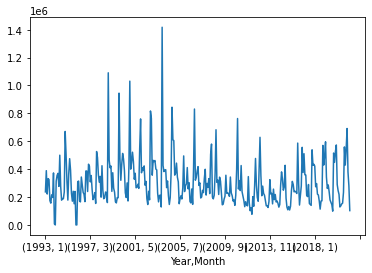

In [ ]:
books_sale.plot()

In [ ]:
# Trailer Indicator
a=trailer_indicator['Total_Trailer'].set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output1=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output1.append(r)

output1=pd.DataFrame(output1,columns=col)

In [ ]:
output1.sort_values(by=['Lag','Max Correlation'],ascending=True)

,Indicators,Lag,Max Correlation
5,Backlog/Build Ratio,82,0.707079
0,BACKLOG,93,0.790438
3,NET ORDERS,97,0.883262
6,Inventory/Factory Shipments Ratio,99,0.883813
2,INVENTORY,100,1.000000
4,FACTORY SHIPMENTS,100,1.000000
1,BUILD FOR,148,0.907042


In [ ]:
# economics_m
a=economics_m.set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output2=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output2.append(r)

output2=pd.DataFrame(output2,columns=col)
output2.sort_values(by=['Lag','Max Correlation'],ascending=True)

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


,Indicators,Lag,Max Correlation
26,S&P 500,67,0.767208
37,Existing Home Sales (000's),75,0.699884
21,Total Bus. Inventories/Retail Sales Ratio,82,0.302504
18,Unemployment Rate (%),165,0.226821
40,W. Texas Int. Crude Oil ($Bbl.),184,0.281779
38,National Avg. Diesel/Gal.,194,0.332951
35,Building Permits (000's),215,0.352434
5,Chemicals Index,216,0.309798
31,Housing Starts (000's),216,0.333493
36,New Home Sales (000's),216,0.353147


In [ ]:
# freight_m
a=freight_m.set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output3=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output3.append(r)

output3=pd.DataFrame(output3,columns=col)
output3.sort_values(by=['Lag','Max Correlation'],ascending=True)

,Indicators,Lag,Max Correlation
39,Y/Y % Change.6,71,0.290844
11,Y/Y % Change.2,73,0.150467
19,Y/Y % Change.4,74,0.293004
10,M/M % Change.2,155,0.232268
7,Y/Y % Change.1,191,0.201867
5,FTR Rail Intermodal Loadings Index (1992=100),225,0.319379
4,"FTR Rail Intermodal Loadings (000, SA)",225,0.319379
22,"Reefer Trailer Loadings (000s, SA)",227,0.312859
26,"Food & Kindred Products (000s, SA)",227,0.361982
37,FTR MD Truck Tonmiles Index (1992=100),228,0.296959


In [ ]:
# indicators-m
a=indicators_m.set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output3=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output3.append(r)

output3=pd.DataFrame(output3,columns=col)
output3.sort_values(by=['Lag','Max Correlation'],ascending=True)

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]

,Indicators,Lag,Max Correlation
46,MEX.1,-1,NaN
64,MEX.3,-1,NaN
71,CAN 2.2,-1,NaN
72,CAN 3.2,-1,NaN
73,CAN 4.2,-1,NaN
...,...,...,...
16,M/M % Change.5,297,0.838886
13,M/M % Change.4,298,0.427794
7,M/M % Change.2,299,0.353254
19,M/M % Change.6,299,0.420249


In [ ]:
output3.dropna().sort_values(by=['Lag','Max Correlation'],ascending=True)

,Indicators,Lag,Max Correlation
70,CAN 1.2,32,0.125875
20,Y/Y % Change.6,58,0.187429
2,Y/Y % Change,135,0.685807
74,MEX 1.2,136,0.222214
57,MEX 3.1,150,0.294047
...,...,...,...
16,M/M % Change.5,297,0.838886
13,M/M % Change.4,298,0.427794
7,M/M % Change.2,299,0.353254
19,M/M % Change.6,299,0.420249


In [ ]:
# trucking
a=trucking.set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output4=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output4.append(r)

output4=pd.DataFrame(output4,columns=col)
output4.sort_values(by=['Lag','Max Correlation'],ascending=True)

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


,Indicators,Lag,Max Correlation
57,TCI Component: Utilization,18,0.52823
56,TCI Component: Loads,26,1.00000
58,TCI Component: TL Rates,26,1.00000
59,TCI Component: Diesel,26,1.00000
60,TCI Component: Capital,26,1.00000
...,...,...,...
81,New Home Sales (000's),254,1.00000
90,Construction Employment (000's),254,1.00000
92,Truck Transportation Employment (000's),254,1.00000
93,Parcel/Courier Employment (000's),254,1.00000


In [ ]:
# rates
a=rates_m.set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output5=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output5.append(r)

output5=pd.DataFrame(output5,columns=col)
output5.sort_values(by=['Lag','Max Correlation'],ascending=True)

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


,Indicators,Lag,Max Correlation
0,Total Intermodal (w/o FSC),209,0.890508
1,Total Intermodal (w/ FSC),210,0.832461


In [ ]:
# summary
a=intermodal_summary.set_index(['Year','Month'])
col=['Indicators','Lag','Max Correlation']
output6=[]
for i in a.columns:
    if i=='Date':
        continue
    indicators=a[i].dropna()
    if len(indicators)<len(books_sale):
        sale_series=books_sale.iloc[np.where(books_sale.index==indicators.index[0])[0][0]:,]
    else:
        sale_series=books_sale
    result = matchByLag(series_1 = indicators,
                    series_2 = sale_series,
                    max_forward = 300)
    imax = numpy.argmax(result['correlation'])
    r=[i,imax,result.iloc[imax]['correlation']]
    output6.append(r)

output6=pd.DataFrame(output6,columns=col)
output6.sort_values(by=['Lag','Max Correlation'],ascending=True)

/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


,Indicators,Lag,Max Correlation
19,Mexico Origin Intermodal VolumesInternational,63,0.832034
21,Mexico Origin Intermodal VolumesTotal,75,0.834912
20,Mexico Origin Intermodal VolumesDomestic,84,1.000000
39,"Western Canadian Port Activity, Total TEUsImports",149,0.672879
38,"Western Canadian Port Activity, Total TEUsnan",150,0.724205
40,"Western Canadian Port Activity, Total TEUsExports",152,0.866496
41,"Western Canadian Port Activity, Total TEUsSA I...",155,0.437619
10,"Container Share %, Total IntermodalTotal Domes...",185,0.697265
9,"Container Share %, Total Intermodalnan",185,0.850024
28,"West Coast Port Activity, Total TEUsExports",187,0.617108
